# HW4

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import csv
import warnings
warnings.filterwarnings('ignore')

# Problem 1

In [2]:
final_cut_off = pd.read_csv('final_cut_off.csv')

In [3]:
final_cut_off['before_cut_off'] = final_cut_off['TFEDREV_after1_x']/0.9
final_cut_off['cut_off_proportion'] =  100*final_cut_off['Amount of Funding Cut']/final_cut_off['before_cut_off']

Text(0.5, 0, 'The Proportion of Losing Funding')

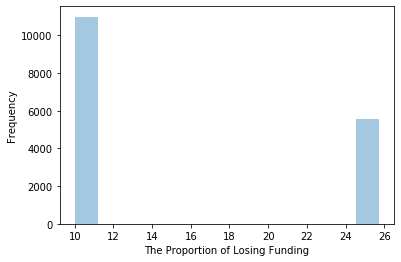

In [4]:
sns.distplot(final_cut_off['cut_off_proportion'],kde=False)
plt.ylabel('Frequency')
plt.xlabel('The Proportion of Losing Funding')

Since I conduct two rounds cutting off, most of districts will lose 10% funding and some district with undesirable performance will lose 25% funding.

In [5]:
final_cut_off.sort_values(by='cut_off_proportion', ascending=False).head(10)[['LEAID','cut_off_proportion']]

,LEAID,cut_off_proportion
8317,3012060,25.74
6953,2700138,25.74
255,400145,25.74
279,400208,25.74
202,400028,25.74
8421,3019530,25.74
8295,3010820,25.74
1575,621960,25.74
5476,2311850,25.74
1641,625110,25.74


# Problem 2

Problem Statement: 

Since my strategy contains two rounds cut-off, for this specific problem, I will focus on the districts experienced two rounds cut-off versus districts only experienced only one round cut-off.

In [8]:
data = pd.read_csv('ccd_lea_052_1516_w_1a_011717.csv')

In [9]:
race = data[['LEAID', 'TOTAL', 'AM', 'AS', 'HI', 'BL', 'WH', 'HP', 'TR']]
race_ = race[race['TOTAL']>0]

In [14]:
race_['AM_PRO'] = 100*race_['AM'] / race_['TOTAL']
race_['AS_PRO'] = 100*race_['AS'] /  race_['TOTAL']
race_['HI_PRO'] = 100*race_['HI'] /  race_['TOTAL']
race_['BL_PRO'] = 100*race_['BL'] /  race_['TOTAL']
race_['WH_PRO'] = 100*race_['WH'] /  race_['TOTAL']
race_['HP_PRO'] = 100*race_['HP'] /  race_['TOTAL']
race_['TR_PRO'] = 100*race_['TR'] /  race_['TOTAL']

districts experienced two rounds cut-off versus districts only experienced only one round cut-off

In [46]:
Round2 = final_cut_off[final_cut_off['2_TFEDREV']>0]['LEAID']
Only_Round1 = final_cut_off[final_cut_off['2_TFEDREV']==0]['LEAID']

In [49]:
Round2_race = pd.merge(race_, Round2)

In [48]:
Only_Round1_race = pd.merge(race_, Only_Round1)

American Indian/Alaska Native:

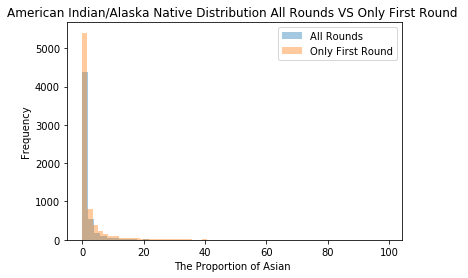

In [72]:
sns.distplot(Round2_race['AS_PRO'],kde=False,label='All Rounds')
sns.distplot(Only_Round1_race['AS_PRO'],kde=False,label='Only First Round')
plt.ylabel('Frequency')
plt.xlabel('The Proportion of Asian ')
plt.title('American Indian/Alaska Native Distribution All Rounds VS Only First Round ')
plt.legend()

 Asian:

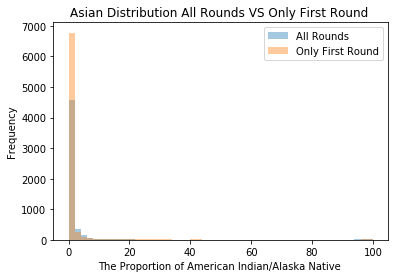

In [64]:
sns.distplot(Round2_race['AM_PRO'],kde=False,label='All Rounds')
sns.distplot(Only_Round1_race['AM_PRO'],kde=False,label='Only First Round')
plt.ylabel('Frequency')
plt.xlabel('The Proportion of American Indian/Alaska Native ')
plt.title('Asian Distribution All Rounds VS Only First Round ')
plt.legend()

Hispanic:

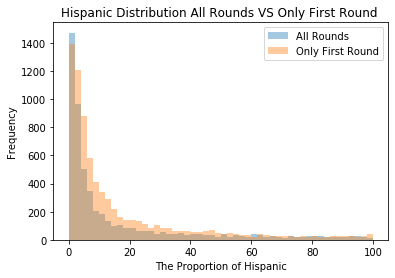

In [65]:
sns.distplot(Round2_race['HI_PRO'],kde=False,label='All Rounds')
sns.distplot(Only_Round1_race['HI_PRO'],kde=False,label='Only First Round')
plt.ylabel('Frequency')
plt.xlabel('The Proportion of Hispanic')
plt.title('Hispanic Distribution All Rounds VS Only First Round ')
plt.legend()

Black:

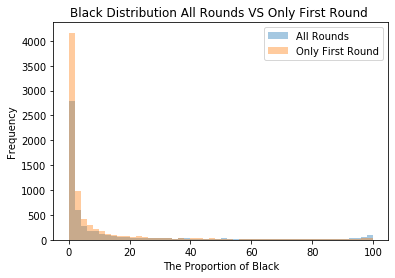

In [66]:
sns.distplot(Round2_race['BL_PRO'],kde=False,label='All Rounds')
sns.distplot(Only_Round1_race['BL_PRO'],kde=False,label='Only First Round')
plt.ylabel('Frequency')
plt.xlabel('The Proportion of Black')
plt.title('Black Distribution All Rounds VS Only First Round ')
plt.legend()

White:

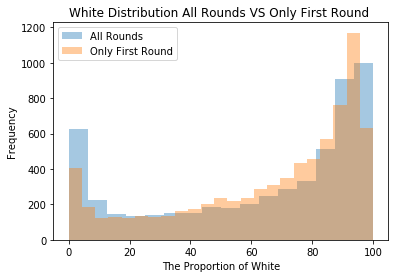

In [67]:
sns.distplot(Round2_race['WH_PRO'],kde=False,label='All Rounds')
sns.distplot(Only_Round1_race['WH_PRO'],kde=False,label='Only First Round')
plt.ylabel('Frequency')
plt.xlabel('The Proportion of White')
plt.title('White Distribution All Rounds VS Only First Round ')
plt.legend()

Hawaiian Native / Pacific Islander:

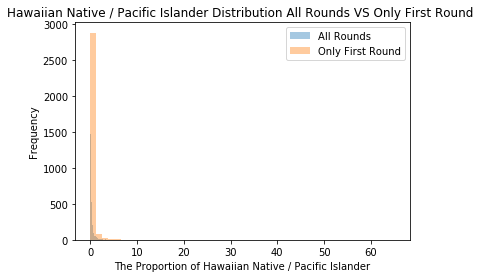

In [69]:
sns.distplot(Round2_race[Round2_race['HP_PRO']>0]['HP_PRO'],kde=False,label='All Rounds')
sns.distplot(Only_Round1_race[Only_Round1_race['HP_PRO']>0]['HP_PRO'],kde=False,label='Only First Round')
plt.ylabel('Frequency')
plt.xlabel('The Proportion of Hawaiian Native / Pacific Islander')
plt.title('Hawaiian Native / Pacific Islander Distribution All Rounds VS Only First Round ')
plt.legend()

Two or More Races:

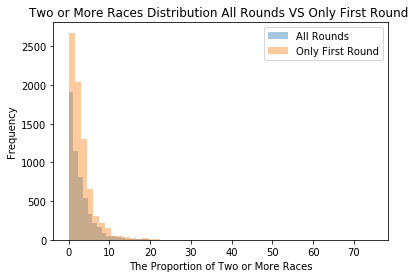

In [70]:
sns.distplot(Round2_race['TR_PRO'],kde=False,label='All Rounds')
sns.distplot(Only_Round1_race['TR_PRO'],kde=False,label='Only First Round')
plt.ylabel('Frequency')
plt.xlabel('The Proportion of Two or More Races')
plt.title('Two or More Races Distribution All Rounds VS Only First Round ')
plt.legend()

Comment:

Based on the above plots, while the distributions appear to be the same for most of the race, there is still some noticeable difference for Hispanic, White and Two or More Races. So, technically, my selection still includes some hidden biases for race of enrolled students.

# Problem 3

Problem Statement: 

Since my strategy contains two rounds cut-off, for this specific problem, I will focus on the districts experienced two rounds cut-off versus districts only experienced only one round cut-off.

In [86]:
df = pd.read_csv('ccd_lea_002089_1516_w_1a_011717.csv')
disability = df[['LEAID', 'SPECED']]
disability_=disability[disability['SPECED']>0]

In [87]:
disability_= pd.merge(disability_,race_)

In [88]:
disability_['DIS_PRO'] = 100*disability_['SPECED']/disability_['TOTAL']

In [89]:
Round2_dis = pd.merge(disability_, Round2)
Only_Round1_dis = pd.merge(disability_, Only_Round1)

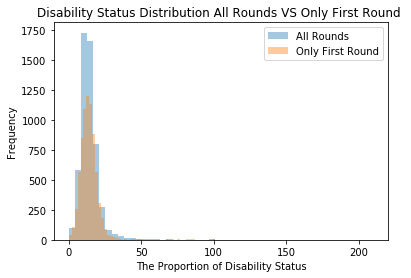

In [90]:
sns.distplot(Round2_dis['DIS_PRO'],kde=False,label='All Rounds')
sns.distplot(Only_Round1_dis['DIS_PRO'],kde=False,label='Only First Round')
plt.ylabel('Frequency')
plt.xlabel('The Proportion of Disability Status')
plt.title('Disability Status Distribution All Rounds VS Only First Round ')
plt.legend()

Comment:

Based on the above plots, the distributions appear to be different. So, technically, my selection still includes some hidden biases for disability status of enrolled students.

# Problem 4

The selection of schools for budget cuts that I choose and critique for this problem could be found at:
https://github.com/tonytontian/DS5500/blob/master/hw3/hw3.ipynb

What was the justification of their selection? Discuss any advantages or disadvantages of their approach.

This strategy is to cut off 15% for every distric which get positive number of federal funding. Actually, this strategy is similar to the first part of my solution. The advantage is that it is the most straightforward way to address this problem and it is fair to most of the districts. However, there still exists some disadvantages in this selection. One of them is that it did not take return of investment into consideration, which means that there is no punishment for those who have undesired performance. And this is unfair to districts that performed well based on funding.

# Problem 5

The special topics lectures that I want to summarize and comment on what I learned from is Causal Inference.

First of all, this is the first time that I access to this topic and I felt like it is very interesting and useful in the real-world industry. During my study in Data Science, I am always focusing on the machine learning algorithms，either supervised or unsupervised，thinking about how to make my model perform well on specific metrics. However, I did not explore much about the data itself for the most of time and think about the causal questions about data. After this lectures, I realized how causal inference could make a difference in data science and some basic knowledge in this area, like Randomized Controlled Trials, Confounding and De-confounding etc. This is a perfect illumination for me to leverage myself in the overall data science lifecycle to become a better data scientist.